In [71]:
!pip install ACO-Pants 

import math #Importação do módulo de funções matemáticas.
import numpy #Importação da biblioteca NumPy, útil para computação científica e operações com matrizes/vetores.
import pants #Importação da biblioteca Pants, relacionada à implementação do ACO.
import random #Importação do módulo para geração e manipulação de números aleatórios.
import matplotlib.pyplot as plt #Para criar gráficos e visualizações

Defaulting to user installation because normal site-packages is not writeable


Gerar gráfico

In [72]:
def grafoTSP(qtdCidades, distMin, distMax): #Esta função é responsável por gerar um grafo aleatório para representar as cidades.
    cidades = numpy.zeros((qtdCidades, qtdCidades), dtype=int)
    
    for i in range(qtdCidades):
        for j in range(qtdCidades):
            if (j > i):
                cidades[i, j] = random.randint(distMin, distMax) #Gera uma distância aleatória entre distMin e distMax
            elif (j < i): #Garante que a matriz seja simétrica, ou seja, a distância de i para j.
                cidades[i, j] = cidades[j, i] #Garante que a matriz seja simétrica, ou seja, a distância de i para j é a mesma de j para i.
    
    return cidades

qtdCidades = 5 # Define um número inicial de cidades.

while(True): #Loop que garante que o usuário insira um número de cidades maior que 4.
    qtdCidades = int(input('Digite o número de cidades: '))
    
    if (qtdCidades > 4):
        break
    else:
        print('O número de cidades deve ser maior que 4!')

cidades = grafoTSP(qtdCidades, 10, 100) # Utiliza a função para criar o grafo.

def distancia(cidadeOrigem, cidadeDestino): #Esta função retorna a distância entre duas cidades específicas. 
    return cidades[cidadeOrigem][cidadeDestino]

print('Cidades:') #Mostra a matriz de cidades.
print(cidades)


Cidades:
[[ 0 39 78 65 70 12]
 [39  0 72 50 84 86]
 [78 72  0 35 97 68]
 [65 50 35  0 71 52]
 [70 84 97 71  0 60]
 [12 86 68 52 60  0]]


Processamente do Algoritmo

In [73]:
nodes = list(range(qtdCidades)) #Cria uma lista de nós com base na quantidade de cidades definida anteriormente. 

world = pants.World(nodes, distancia) #Utilizando a biblioteca pants, criamos uma representação do "mundo". Este mundo é composto 

solver = pants.Solver() #Inicializa o Solver. O Solver é a parte da biblioteca pants que tentará encontrar 

solution = solver.solve(world) #O Solver é então usado para encontrar a melhor solução possível para o mundo definido.

print('Caminho:', solution.tour) #Imprime o melhor caminho encontrado pelo Solver.

print('Melhor caminho encontrado:', solution.distance) #Imprime o custo total (distância) do melhor caminho encontrado.


Caminho: [2, 3, 4, 5, 0, 1]
Melhor caminho encontrado: 289


In [74]:
!pip install ACO-Pants 

import math #Importação do módulo de funções matemáticas.
import numpy #Importação da biblioteca NumPy, útil para computação científica e operações com matrizes/vetores.
import pants #Importação da biblioteca Pants, relacionada à implementação do ACO.
import random #Importação do módulo para geração e manipulação de números aleatórios.
import matplotlib.pyplot as plt #Para criar gráficos e visualizações

Defaulting to user installation because normal site-packages is not writeable


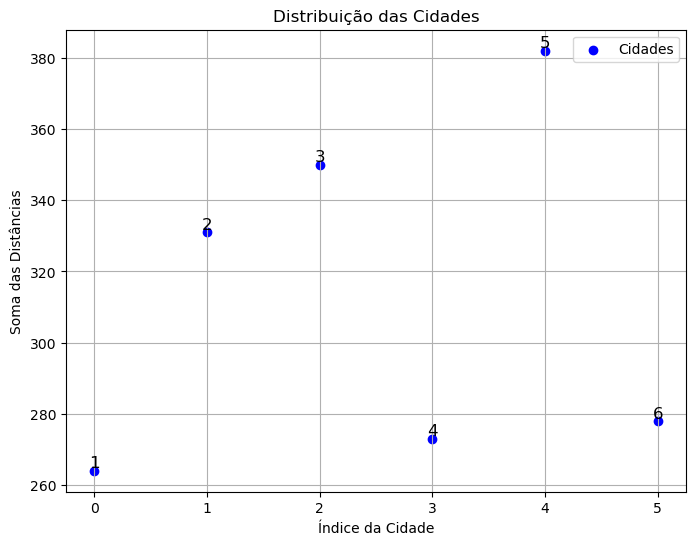

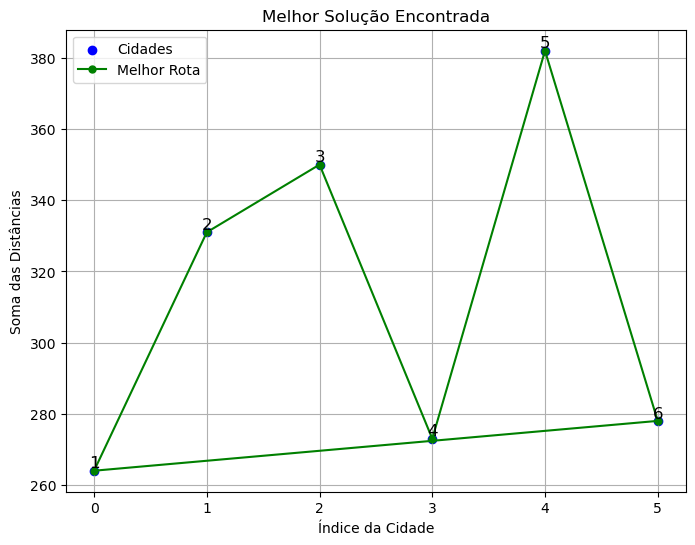

In [75]:
#Função responsável por exibir as cidades em um gráfico de dispersão.
def plotar_cidades(cidades_matrix):
    qtdCidades = len(cidades_matrix)
    x = list(range(qtdCidades))
    y = [sum(cidades_matrix[i]) for i in range(qtdCidades)]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, c='blue', marker='o', label='Cidades')
    for i, txt in enumerate(range(1, qtdCidades + 1)):
        plt.annotate(txt, (x[i], y[i]), fontsize=12, ha='center', va='bottom')
    plt.title('Distribuição das Cidades')
    plt.xlabel('Índice da Cidade')
    plt.ylabel('Soma das Distâncias')
    plt.legend()
    plt.grid(True)

#Função responsável por exibir a melhor rota encontrada pelo algoritmo em um gráfico.
def plotar_melhor_solucao(cidades_matrix, solucao):
    qtdCidades = len(cidades_matrix)
    x = list(range(qtdCidades))
    y = [sum(cidades_matrix[i]) for i in range(qtdCidades)]
    
    plt.figure(figsize=(8, 6))
    
    #Mostra as cidades no gráfico.
    plt.scatter(x, y, c='blue', marker='o', label='Cidades')
    for i, txt in enumerate(range(1, qtdCidades + 1)):
        plt.annotate(txt, (x[i], y[i]), fontsize=12, ha='center', va='bottom')
    
    #Mostra a melhor rota encontrada.
    rota = solucao.tour
    rota_x = [x[i] for i in rota]
    rota_y = [y[i] for i in rota]
    rota_x.append(rota_x[0])
    rota_y.append(rota_y[0])
    plt.plot(rota_x, rota_y, linestyle='-', marker='o', markersize=5, color='green', label='Melhor Rota')
    
    plt.title('Melhor Solução Encontrada')
    plt.xlabel('Índice da Cidade')
    plt.ylabel('Soma das Distâncias')
    plt.legend()
    plt.grid(True)

#Mostra a distribuição das cidades.
plotar_cidades(cidades)

#Mostra a melhor rota encontrada.
plotar_melhor_solucao(cidades, solution)

#Exibe os gráficos.
plt.show()